In [1]:
import warnings
warnings.filterwarnings('ignore')

# About this notebook

* Author: Anubhav Jain
* Github repo: https://github.com/computron/pymatgen_tutorials
* YouTube video: https://youtu.be/Uz6Fm78z2xM

![alt text](graphics/title.png "Title: Learn Pymatgen Part 2: Vasp Inputs and Outputs")

# Learn pymatgen
## Part 1: VASP Inputs and Outputs

This tutorial will cover:

* Creating VASP input files (manually, automatically, and semi-automatically)
* Parsing various types of VASP output files into objects that can be analyzed and plotted

---

*If you don't know what a pymatgen ``Structure`` is, see the tutorial part 1.*

---

Let's start!








In [2]:
import pymatgen  # pymatgen needs to be installed (v2024.6.10 at time of this tutorial)


# define a helper function for printing the contents of files
def print_file(fname, nlines=10, header=False):
    with open(fname) as f:
        lines = f.readlines()
        if nlines == 0:
            nlines = len(lines)
        content = "".join(lines[:nlines])
        if len(lines) > nlines:
            content += "..."
        if header:
            print(f"---{fname}---")
        print(content)


# Let's write VASP input files (manually)

Using pymatgen, we can generate VASP input files:
* Manually
* Automatically using a "recipe" based on the ``Structure`` and intended calculation type
* By inheriting some settings from a directory containing an existing VASP calculation


We'll start by manually creating the VASP input files.

![alt text](graphics/input_methods.png "Various methods of creating VASP Inputs with pymatgen")

# Preliminaries: setting up your POTCAR directory

*Note: this step is needed only if you want to write POTCAR files with pymatgen.*

* POTCAR files are not distributed by pymatgen and must be downloaded from your VASP installation
* Instructions to set up the POTCAR files for pymatgen are at: https://pymatgen.org/installation.html
* In a nutshell, pymatgen will:
    * read the POTCAR files from VASP
    * copy them into a custom directory structure
    * store the location of the POTCAR directory in a configuration file (``~/.pmgrc.yaml``) so pymatgen knows where to find your POTCAR files

The commands will look something like:

```
pmg config -p /path/to/pseudos/potcar_PBE.54 /path/to/pseudos/pmg_potcars
pmg config -p /path/to/pseudos/potcar_LDA.54 /path/to/pseudos/pmg_potcars
pmg config --add PMG_VASP_PSP_DIR /path/to/pseudos/pmg_potcars
```

In [3]:
from pymatgen.io.vasp import Potcar

try:
    potcar = Potcar(["Fe_pv", "O"], functional="PBE_54")  # note that PBE_54 is if you have installed potcar_PBE.54
    print("POTCAR setup is correct.")
    print(potcar)
except Exception as e:
    print(f"Error: {e}")
    print("Please ensure you have set up the POTCARs according to the instructions at: https://pymatgen.org/installation.html")
    print('Note also that your functional should match your POTCAR; options for functional include: "PBE", "PBE_52", "PBE_54", "LDA", "LDA_52", "LDA_54", "PW91", "LDA_US", "PW91_US"')


POTCAR setup is correct.
  PAW_PBE Fe_pv 02Aug2007                
   14.0000000000000     
 parameters from PSCTR are:
   VRHFIN =Fe:  3pd7s1
   LEXCH  = PE
   EATOM  =  2457.4239 eV,  180.6156 Ry

   TITEL  = PAW_PBE Fe_pv 02Aug2007
   LULTRA =        F    use ultrasoft PP ?
   IUNSCR =        1    unscreen: 0-lin 1-nonlin 2-no
   RPACOR =    1.750    partial core radius
   POMASS =   55.847; ZVAL   =   14.000    mass and valenz
   RCORE  =    2.200    outmost cutoff radius
   RWIGS  =    2.200; RWIGS  =    1.164    wigner-seitz radius (au A)
   ENMAX  =  293.238; ENMIN  =  219.928 eV
   ICORE  =        3    local potential
   LCOR   =        T    correct aug charges
   LPAW   =        T    paw PP
   EAUG   =  578.342
   DEXC   =    0.000
   RMAX   =    2.249    core radius for proj-oper
   RAUG   =    1.300    factor for augmentation sphere
   RDEP   =    2.296    radius for radial grids
   RDEPT  =    1.766    core radius for aug-charge
 
   Atomic configuration
    8 entries
     

In [4]:
from pymatgen.core import Structure, Lattice
# Create the NaCl structure
lattice = Lattice.cubic(5.64)  # Lattice parameter for NaCl
structure = Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])

structure.sort()  # this groups all elements of a single type together, makes the POTCAR easier

print(structure)

Full Formula (Na1 Cl1)
Reduced Formula: NaCl
abc   :   5.640000   5.640000   5.640000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na    0    0    0
  1  Cl    0.5  0.5  0.5


In [5]:
# Create and write the INCAR file

from pymatgen.io.vasp import Incar

incar = Incar({
    "ENCUT": 520,
    "IBRION": 2,
    "ISIF": 3,
    "ISMEAR": -5,
    "SIGMA": 0.1,
    "EDIFF": 1e-5,
    "LMAXMIX": 4,
    "NSW": 50
})

incar.write_file("INCAR")

print_file("INCAR", nlines=10)

EDIFF = 1e-05
ENCUT = 520
IBRION = 2
ISIF = 3
ISMEAR = -5
LMAXMIX = 4
NSW = 50
SIGMA = 0.1



In [6]:
# Create and write the POSCAR file

from pymatgen.io.vasp import Poscar

poscar = Poscar(structure)
poscar.write_file("POSCAR")

print_file("POSCAR")

Na1 Cl1
1.0
   5.6399999999999997    0.0000000000000000    0.0000000000000000
   0.0000000000000000    5.6399999999999997    0.0000000000000000
   0.0000000000000000    0.0000000000000000    5.6399999999999997
Na Cl
1 1
direct
   0.0000000000000000    0.0000000000000000    0.0000000000000000 Na
   0.5000000000000000    0.5000000000000000    0.5000000000000000 Cl



In [7]:
# Create and write the KPOINTS file

from pymatgen.io.vasp import Kpoints

kpoints = Kpoints.automatic(1000)
kpoints.write_file("KPOINTS")

print_file("KPOINTS")

Fully automatic kpoint scheme
0
Automatic
1000



In [8]:
# Create and write the POTCAR file

from pymatgen.io.vasp import Potcar

# Specify the POTCAR symbols for NaCl --> these should be in the same order as POSCAR
symbols = ["Na_pv", "Cl"]

potcar = Potcar(symbols, functional="PBE_54")  # remember that your functional should match your installed POTCARs
potcar.write_file("POTCAR")

print_file("POTCAR", nlines=0)

  PAW_PBE Na_pv 19Sep2006                
   7.00000000000000     
 parameters from PSCTR are:
   VRHFIN =Na: p6s1
   LEXCH  = PE
   EATOM  =   766.0439 eV,   56.3026 Ry

   TITEL  = PAW_PBE Na_pv 19Sep2006
   LULTRA =        F    use ultrasoft PP ?
   IUNSCR =        1    unscreen: 0-lin 1-nonlin 2-no
   RPACOR =    1.800    partial core radius
   POMASS =   22.990; ZVAL   =    7.000    mass and valenz
   RCORE  =    2.200    outmost cutoff radius
   RWIGS  =    2.200; RWIGS  =    1.164    wigner-seitz radius (au A)
   ENMAX  =  259.561; ENMIN  =  194.671 eV
   ICORE  =        2    local potential
   LCOR   =        T    correct aug charges
   LPAW   =        T    paw PP
   EAUG   =  368.056
   DEXC   =    0.000
   RMAX   =    2.245    core radius for proj-oper
   RAUG   =    1.300    factor for augmentation sphere
   RDEP   =    2.259    radius for radial grids
   RDEPT  =    1.738    core radius for aug-charge
 
   Atomic configuration
    5 entries
     n  l   j            E       

# Let's write VASP input files (automatically)

We can also create VASP input files **automatically** using a ``VaspInputSet`` object.

A ``VaspInputSet`` object is a "recipe" to create the appropriate input parameters based on the ``Structure`` and intended calculation type
* Different ``VASPInputSet`` classes will have different intentions (*e.g.*, a structure relaxation, a static run, a band structure calculation, etc.) and thereby have different settings.
* The same ``VASPInputSet`` may give different settings depending on the ``Structure`` (*e.g.*, use a higher k-point mesh for a system with a smaller unit cell or that is metallic).


Let's explore VASPInputSets!

![alt text](graphics/vis_automation.png "Automating VASP input generation using VaspInputSets.")

# Types of VASPInputSets

There are many different VASPInputSets implemented in ``pymatgen.io.vasp.sets.py``. Some of the major ones are:

* ``MPRelaxSet`` &rarr; perform a structure relaxation (Materials Project settings)
* ``MPStaticSet`` &rarr; get a high quality energy using a static calculation (MaterialsProject settings)
* ``MPNonSCFSet`` &rarr; perform a high quality band structure or DOS calculation using an existing charge density (Materials Project settings)
* ``MVLSlabSet`` &rarr; perform slab / surface calculations (Materials Virtual Lab settings)

The prefixes have meanings:
* ``MP`` &rarr; Materials Project (mostly advised for general use when available)
* ``MVL`` &rarr; Materials Virtual Lab
* ``MIT`` &rarr; Massachussetts Institute of Technology (typically older / less precise settings left for historical reasons)



Let's look for example at the ``MPRelaxSet``, ``MPScanRelaxSet``, and ``MPStaticSet``!


In [9]:
from pymatgen.io.vasp.sets import MPRelaxSet

# Generate VASP input files using MPRelaxSet
vasp_input_set = MPRelaxSet(structure)
vasp_input_set.write_input(".")

# Print the outputs
print_file("INCAR", nlines=10, header=True)
print_file("KPOINTS", nlines=10, header=True)
print_file("POSCAR", nlines=10, header=True)
print_file("POTCAR", nlines=10, header=True)


---INCAR---
ALGO = Fast
EDIFF = 0.0001
ENCUT = 520
IBRION = 2
ISIF = 3
ISMEAR = -5
ISPIN = 2
LASPH = True
LORBIT = 11
LREAL = Auto
...
---KPOINTS---
pymatgen with grid density = 177 / number of atoms
0
Monkhorst
4 4 4

---POSCAR---
Na1 Cl1
1.0
   5.6399999999999997    0.0000000000000000    0.0000000000000000
   0.0000000000000000    5.6399999999999997    0.0000000000000000
   0.0000000000000000    0.0000000000000000    5.6399999999999997
Na Cl
1 1
direct
   0.0000000000000000    0.0000000000000000    0.0000000000000000 Na
   0.5000000000000000    0.5000000000000000    0.5000000000000000 Cl

---POTCAR---
  PAW_PBE Na_pv 05Jan2001                
 7.00000000000000000
 parameters from PSCTR are:
   VRHFIN =Na: p6s1
   LEXCH  = PE
   EATOM  =   766.0439 eV,   56.3026 Ry

   TITEL  = PAW_PBE Na_pv 05Jan2001
   LULTRA =        F    use ultrasoft PP ?
   IUNSCR =        1    unscreen: 0-lin 1-nonlin 2-no
...


In [10]:
from pymatgen.io.vasp.sets import MPScanRelaxSet

# Generate VASP input files using MPScanRelaxSet
vasp_input_set = MPScanRelaxSet(structure, vdw="rVV10")
vasp_input_set.write_input(".")

# Print the outputs
print_file("INCAR", nlines=0, header=True)

# Note: this INCAR uses KSPACING, which means that a KPOINTS file will not be written.
# If you see a KPOINTS file, it is a remnant of the previous VaspInputSet.


---INCAR---
ALGO = All
BPARAM = 15.7
EDIFF = 1e-05
EDIFFG = -0.02
ENAUG = 1360
ENCUT = 680
IBRION = 2
ISIF = 3
ISMEAR = 0
ISPIN = 2
KSPACING = 0.22
LAECHG = True
LASPH = True
LCHARG = True
LELF = False
LMIXTAU = True
LORBIT = 11
LREAL = Auto
LUSE_VDW = True
LVTOT = True
LWAVE = False
MAGMOM = 2*0.6
METAGGA = R2scan
NELM = 200
NSW = 99
PREC = Accurate
SIGMA = 0.2



In [11]:
from pymatgen.io.vasp.sets import MPStaticSet

vasp_input_set = MPStaticSet(structure)
vasp_input_set.write_input(".")

print_file("INCAR", nlines=0, header=True)
print_file("KPOINTS", nlines=10, header=True)

---INCAR---
ALGO = Fast
EDIFF = 0.0001
ENCUT = 520
ISMEAR = -5
ISPIN = 2
LASPH = True
LCHARG = True
LORBIT = 11
LREAL = False
LWAVE = False
MAGMOM = 2*0.6
NELM = 100
NSW = 0
PREC = Accurate
SIGMA = 0.05

---KPOINTS---
pymatgen with grid density = 277 / number of atoms
0
Gamma
5 5 5



# Overriding settings

* Each ``VASPInputSet`` does its best to give sensible settings, but you can override those settings as needed
* In the next example, we will increase the energy cutoff (ENCUT) and increase the k-point density of the ``MPStaticSet`` to have a more precise calculation

In [12]:
# Define custom settings
user_incar_settings = {"ENCUT": 700}
user_kpoint_settings = {"reciprocal_density": 1000}  # kpoints per inverse Angstrom in reciprocal space

# Generate VASP input files using MPStaticSet with custom settings
vasp_input_set = MPStaticSet(
    structure, 
    user_incar_settings=user_incar_settings,
    user_kpoints_settings=user_kpoint_settings
)
vasp_input_set.write_input(".")

print_file("INCAR", nlines=10, header=True)
print_file("KPOINTS", nlines=10, header=True)

---INCAR---
ALGO = Fast
EDIFF = 0.0001
ENCUT = 700
ISMEAR = -5
ISPIN = 2
LASPH = True
LCHARG = True
LORBIT = 11
LREAL = False
LWAVE = False
...
---KPOINTS---
pymatgen with grid density = 2765 / number of atoms
0
Gamma
11 11 11



# Using a previous calculation as the basis for a new calculation

* Often, we want to inherit some settings from a previous job while overloading other settings
* For example, it is common to perform a static calculation after a relaxation run. In such instances you typically want to inherit all the settings of the previous job but with a few changes:
    * update the structure to be the relaxed structure
    * turn off the structure relaxation
    * increase the k-point mesh
    * any other changes like adding a dielectric constant calculation
* Pymatgen makes it possible for ``VaspInputSet`` objects to inherit settings from a previous calculation using the ``from_prev_calc()`` method.

![alt text](graphics/input_from_previous.png "Getting VASP parameters from a previous calculation")

In [13]:
from pymatgen.io.vasp.sets import MPStaticSet
vasp_input_set = MPStaticSet.from_prev_calc("files/Si_HSE_relax_output")
vasp_input_set.write_input(".")

# Print the outputs
print_file("INCAR", nlines=0, header=True)
print_file("KPOINTS", nlines=10, header=True)
print_file("POSCAR", nlines=10, header=True)
print_file("POTCAR", nlines=10, header=True)


---INCAR---
ALGO = All
EDIFF = 1e-05
ENAUG = 1360.0
ENCUT = 680.0
GGA = Pe
HFSCREEN = 0.2
ISMEAR = -5
ISPIN = 2
LAECHG = True
LASPH = True
LCHARG = True
LELF = True
LHFCALC = True
LMIXTAU = True
LORBIT = 11
LREAL = False
LVTOT = True
LWAVE = False
MAGMOM = 2*0.0
NELM = 200
NSW = 0
PREC = Accurate
PRECFOCK = Fast
SIGMA = 0.05

---KPOINTS---
pymatgen with grid density = 1235 / number of atoms
0
Gamma
8 8 8

---POSCAR---
Si2
1.0
   3.3294085500000001    0.0000000000000000    1.9222347600000000
   1.1098025199999999    3.1389971600000002    1.9222347600000000
   0.0000000000000000    0.0000000000000000    3.8444704999999999
Si
2
direct
   0.2500000000000000    0.2500000000000000    0.2500000000000000 Si
  -0.0000000000000000   -0.0000000000000000   -0.0000000000000000 Si

---POTCAR---
 PAW_PBE Si 05Jan2001
 4.00000000000000000
 parameters from PSCTR are:
   VRHFIN =Si: s2p2
   LEXCH  = PE
   EATOM  =   103.0669 eV,    7.5752 Ry

   TITEL  = PAW_PBE Si 05Jan2001
   LULTRA =        F    use 

# The internals of VASPInputSets

VASPInputSets are somewhat complex because the rules come from many places. 

In general, INCAR rules are applied in the following order (least to most priority):
* config_dict
* prev_incar
* VaspInputSet.incar rules / auto_updates
* incard_updates
* user_incar_settings

![alt text](graphics/vis_hierarchy.png "Hierarchy of VASP Input Set")

# Parsing VASP output files

After successfully running VASP on your input files, you will have a series of output files that contain different types of calculated information.

Pymatgen can parse these files and make the information available via objects. Typically, each type of output file in VASP has its own corresponding object (the CONTCAR is an exception).

Next, let's parse some VASP output files.

![alt text](graphics/vasp_output.png "VASP output file parsing")

In [14]:
# CONTCAR example

s = Structure.from_file("files/Si_relax_output/CONTCAR")  # The CONTCAR does not have its own dedicated object
print(s)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.867871   3.867872   3.867870
angles:  60.000012  60.000003  60.000011
pbc   :       True       True       True
Sites (2)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Si    0.875  0.875  0.875
  1  Si    0.125  0.125  0.125


In [15]:
# OSZICAR example

from pymatgen.io.vasp.outputs import Oszicar

oszicar = Oszicar("files/Si_relax_output/OSZICAR")

# Display the number of ionic steps
num_ionic_steps = len(oszicar.ionic_steps)
print(f"Number of ionic steps: {num_ionic_steps}")

# Access and display the final ionic step
final_step = oszicar.ionic_steps[-1]
print(f"Final ionic step: {final_step}")

# Display the energy and free energy of the final step
final_energy = final_step["E0"]
print(f"Final energy: {final_energy} eV")

print("")
print("All ionic and electronic steps:")
for istep_num, ionic_step in enumerate(oszicar.ionic_steps):
    print(istep_num, ionic_step)
    for estep_num, electronic_step in enumerate(oszicar.electronic_steps[istep_num]):
        print("--->", estep_num, electronic_step)

Number of ionic steps: 1
Final ionic step: {'F': -10.841457, 'E0': -10.841457, 'dE': -10.8415, 'mag': -0.0}
Final energy: -10.841457 eV

All ionic and electronic steps:
0 {'F': -10.841457, 'E0': -10.841457, 'dE': -10.8415, 'mag': -0.0}
---> 0 {'N': 1, 'E': -1.33097315926, 'dE': -1.331, 'deps': -331.09, 'ncg': 1280, 'rms': 40.3}
---> 1 {'N': 2, 'E': -10.9517951747, 'dE': -9.6208, 'deps': -9.6036, 'ncg': 1888, 'rms': 3.72}
---> 2 {'N': 3, 'E': -11.0107039148, 'dE': -0.058909, 'deps': -0.058909, 'ncg': 1440, 'rms': 0.368}
---> 3 {'N': 4, 'E': -11.0108565494, 'dE': -0.00015263, 'deps': -0.00015263, 'ncg': 2384, 'rms': 0.0201}
---> 4 {'N': 5, 'E': -11.0108565559, 'dE': -6.5514e-09, 'deps': -6.5514e-09, 'ncg': 1456, 'rms': 0.000122, 'rms(c)': 0.475}
---> 5 {'N': 6, 'E': -10.8940848399, 'dE': 0.11677, 'deps': -0.0025517, 'ncg': 1280, 'rms': 0.056, 'rms(c)': 0.29}
---> 6 {'N': 7, 'E': -10.8399729817, 'dE': 0.054112, 'deps': -0.0060522, 'ncg': 1280, 'rms': 0.0939, 'rms(c)': 0.018}
---> 7 {'N': 

In [16]:
# OUTCAR example

from pymatgen.io.vasp.outputs import Outcar

# Initialize the OUTCAR object
outcar = Outcar("files/Si_optics/OUTCAR")

print(f"Final energy: {outcar.final_energy}")
print(f"Run statistics: {outcar.run_stats}")

Final energy: -10.84724352
Run statistics: {'Average memory used (kb)': None, 'Maximum memory used (kb)': 43950080.0, 'Elapsed time (sec)': 10.288, 'System time (sec)': 1.297, 'User time (sec)': 8.89, 'Total CPU time used (sec)': 10.187, 'cores': 4}


In [17]:
import pandas as pd

# For some OUTCAR properties, you need to explicitly call a read() function
# This is to save time in the initial parse of an OUTCAR
outcar.read_freq_dielectric()

dielectric_tensor = outcar.dielectric_tensor_function

data = {
    "Energy (eV)": outcar.dielectric_energies,
    "Dielectric Tensor (xx)": [tensor[0][0] for tensor in dielectric_tensor],
    "Dielectric Tensor (yy)": [tensor[1][1] for tensor in dielectric_tensor],
    "Dielectric Tensor (zz)": [tensor[2][2] for tensor in dielectric_tensor],
    "Dielectric Tensor (xy)": [tensor[0][1] for tensor in dielectric_tensor],
    "Dielectric Tensor (xz)": [tensor[0][2] for tensor in dielectric_tensor],
    "Dielectric Tensor (yz)": [tensor[1][2] for tensor in dielectric_tensor]
}

df = pd.DataFrame(data)
print(df.head())

   Energy (eV)  Dielectric Tensor (xx)  Dielectric Tensor (yy)  \
0     0.000000    13.606245+ 0.000000j    13.606250+ 0.000000j   
1     0.007019    13.606285+ 0.001170j    13.606291+ 0.001170j   
2     0.014039    13.606408+ 0.002339j    13.606414+ 0.002339j   
3     0.021058    13.606613+ 0.003509j    13.606618+ 0.003509j   
4     0.028077    13.606899+ 0.004679j    13.606905+ 0.004679j   

   Dielectric Tensor (zz)  Dielectric Tensor (xy)  Dielectric Tensor (xz)  \
0    13.606249+ 0.000000j     -0.000001+0.000000j     -0.000002+0.000000j   
1    13.606290+ 0.001170j     -0.000001+0.000000j     -0.000002+0.000000j   
2    13.606413+ 0.002339j     -0.000001+0.000000j     -0.000002+0.000000j   
3    13.606617+ 0.003509j     -0.000001+0.000000j     -0.000002+0.000000j   
4    13.606904+ 0.004679j     -0.000001+0.000000j     -0.000002+0.000000j   

   Dielectric Tensor (yz)  
0     -0.000001+0.000000j  
1     -0.000001+0.000000j  
2     -0.000001+0.000000j  
3     -0.000001+0.000000j  


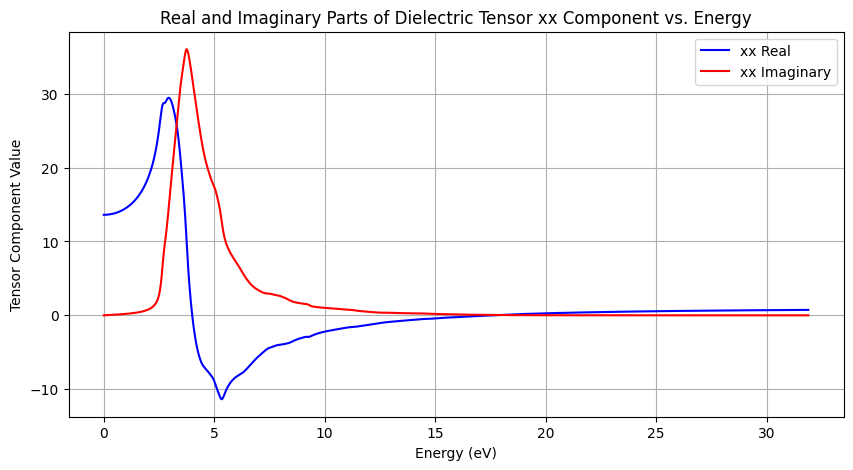

In [18]:
# Plot the dielectric function
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Real part of the xx component
plt.plot(data["Energy (eV)"], [x.real for x in data["Dielectric Tensor (xx)"]], label='xx Real', color='blue')

# Imaginary part of the xx component
plt.plot(data["Energy (eV)"], [x.imag for x in data["Dielectric Tensor (xx)"]], label='xx Imaginary', color='red')

plt.title('Real and Imaginary Parts of Dielectric Tensor xx Component vs. Energy')
plt.xlabel('Energy (eV)')
plt.ylabel('Tensor Component Value')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# vasprun.xml example

from pymatgen.io.vasp.outputs import Vasprun

vasprun = Vasprun("files/Si_HSE_relax_output/vasprun.xml")

# Basic analysis
final_energy = vasprun.final_energy  # Final total energy
final_structure = vasprun.final_structure  # Final total energy

print(f"Final energy: {final_energy}")
print(f"Final structure: {final_structure}")

Final energy: -12.5326576 eV
Final structure: Full Formula (Si2)
Reduced Formula: Si
abc   :   3.844470   3.844470   3.844470
angles:  60.000006  60.000002  60.000010
pbc   :       True       True       True
Sites (2)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Si     0.25   0.25   0.25
  1  Si    -0     -0     -0


Band gap: {'direct': False, 'energy': 1.1960000000000006, 'transition': '\\Gamma-(0.413,0.000,0.413)'}
Direct band gap: 3.331800000000001


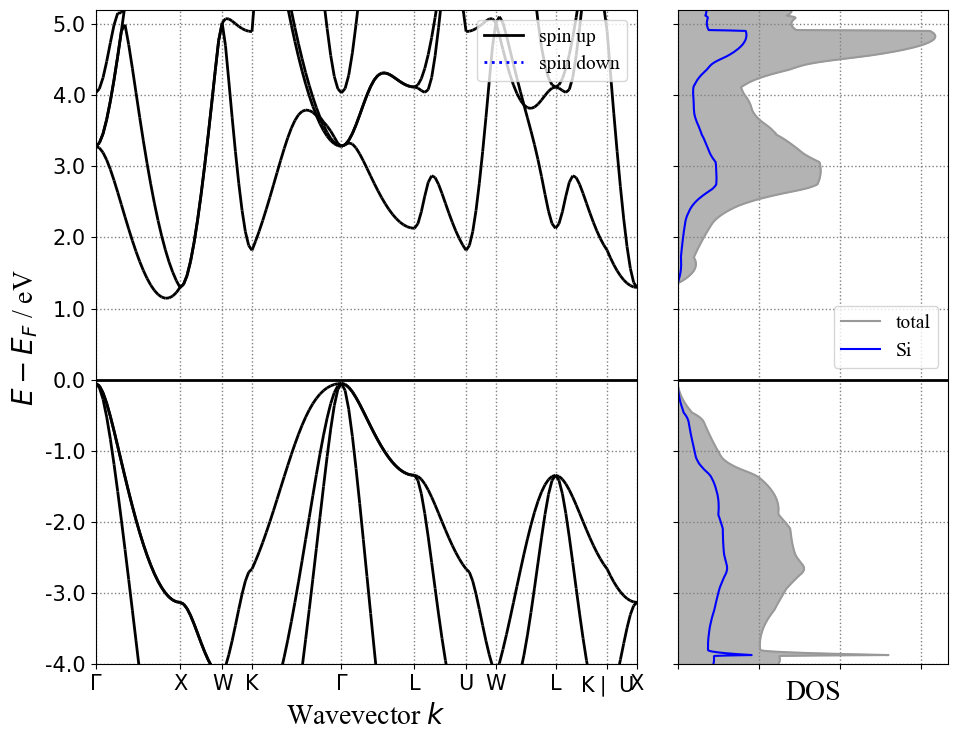

In [20]:
# Get the DOS and band structure from vasprun.xml
import matplotlib.pyplot as plt
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import BSDOSPlotter

# Parse the band structure
bs = Vasprun("files/Si_HSE_band_structure_line/vasprun.xml").get_band_structure(line_mode=True)

# Inspect the band structure for the band gap
band_gap = bs.get_band_gap()
band_gap_direct = bs.get_direct_band_gap()
print(f"Band gap: {band_gap}")
print(f"Direct band gap: {band_gap_direct}")

# Parse the DOS
dos = Vasprun("files/Si_HSE_band_structure_uniform/vasprun.xml").complete_dos

# Plot the band structure and DOS
bsp = BSDOSPlotter()
ax_bs, ax_dos = bsp.get_plot(bs, dos)
plt.show()